In [14]:
import torch 
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F 
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt 
import numpy as np 


In [15]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5 ,))])

trainset = torchvision.datasets.MNIST(root='./data', train = True , download = True , transform=transform)

In [16]:
trainloader = torch.utils.data.DataLoader(trainset , batch_size=32, shuffle=True)

testset=torchvision.datasets.MNIST(root = '/.data', train = False , download = True , transform = transform)

testloader = torch.utils.data.DataLoader( testset , batch_size=32 , shuffle=True)

In [17]:
classes = tuple(str(i) for i in range(10))

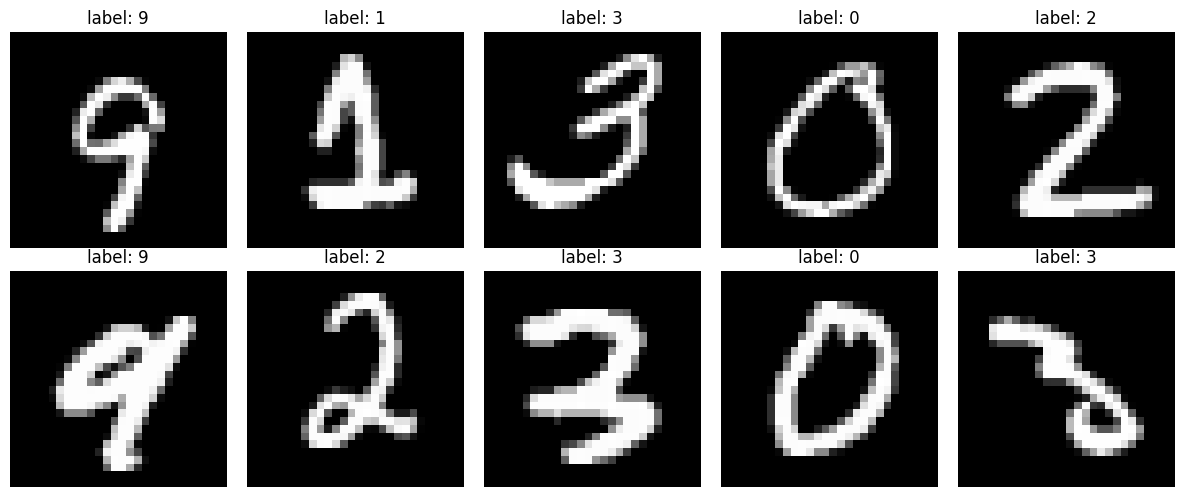

In [18]:
images , labels = next(iter(trainloader))

fig , axes = plt.subplots(2 , 5 , figsize=(12 , 5))
for i ,ax in enumerate(axes.flatten()):  
        ax.imshow(images[i].numpy().squeeze(), cmap='gray')
        ax.set_title(f'label: {labels[i].item()}')
        ax.axis('off')
plt.tight_layout()
        


In [25]:
class CNN(nn.Module):
    def __init__(self): 
        super(CNN , self).__init__()
        self.conv1=nn.Conv2d(1 , 32 , kernel_size = 3 , stride=1 , padding='same')
        self.conv2=nn.Conv2d(32 , 64 , kernel_size=3 , stride = 1 , padding='same')
        self.conv3 = nn.Conv2d(64 , 128 , kernel_size =3 , stride=1 , padding='same')
        self.fc1 = nn.Linear(128*3*3 , 256)
        self.fc2 = nn.Linear(256 , 128)
        self.fc3 = nn.Linear(128 , 10)
        self.pool = nn.MaxPool2d(2 , 2)
        self.dropout = nn.Dropout(0.25)
        
    def forward(self , x): 
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=self.pool(F.relu(self.conv3(x)))
        x=x.view( -1 , 128*3*3)
        x=F.relu(self.fc1(x))
        x=self.dropout(x)
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
        

In [26]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [29]:
def train_model(model , trainloader , criterion , optimizer , num_epochs=5):
        for epoch in range(num_epochs): 
            running_loss = 0.0 
            for i  , data in enumerate(trainloader , 0):
                inputs , labels= data 
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs , labels)
                loss.backward()
                optimizer.step()
                running_loss +=loss.item()
                if i % 100 == 99 : 
                    print(f'[{epoch +1} , {i+1} ] loss: {running_loss/100:.3f}') 
                    running_loss = 0.0 
                    
        print('finished_training')
        
train_model(model , trainloader , criterion , optimizer , num_epochs=5)

[1 , 100 ] loss: 0.040
[1 , 200 ] loss: 0.022
[1 , 300 ] loss: 0.018
[1 , 400 ] loss: 0.023
[1 , 500 ] loss: 0.019
[1 , 600 ] loss: 0.016
[1 , 700 ] loss: 0.015
[1 , 800 ] loss: 0.029
[1 , 900 ] loss: 0.020
[1 , 1000 ] loss: 0.018
[1 , 1100 ] loss: 0.023
[1 , 1200 ] loss: 0.033
[1 , 1300 ] loss: 0.027
[1 , 1400 ] loss: 0.028
[1 , 1500 ] loss: 0.030
[1 , 1600 ] loss: 0.034
[1 , 1700 ] loss: 0.018
[1 , 1800 ] loss: 0.029
[2 , 100 ] loss: 0.011
[2 , 200 ] loss: 0.020
[2 , 300 ] loss: 0.013
[2 , 400 ] loss: 0.023
[2 , 500 ] loss: 0.020
[2 , 600 ] loss: 0.023
[2 , 700 ] loss: 0.026
[2 , 800 ] loss: 0.018
[2 , 900 ] loss: 0.021
[2 , 1000 ] loss: 0.020
[2 , 1100 ] loss: 0.020
[2 , 1200 ] loss: 0.013
[2 , 1300 ] loss: 0.021
[2 , 1400 ] loss: 0.023
[2 , 1500 ] loss: 0.019
[2 , 1600 ] loss: 0.013
[2 , 1700 ] loss: 0.035
[2 , 1800 ] loss: 0.012
[3 , 100 ] loss: 0.023
[3 , 200 ] loss: 0.022
[3 , 300 ] loss: 0.016
[3 , 400 ] loss: 0.014
[3 , 500 ] loss: 0.013
[3 , 600 ] loss: 0.023
[3 , 700 ] loss:

In [31]:
correct = 0 
total=0 
with torch.no_grad():
        for data in trainloader: 
            images , labels = data 
            outputs = model(images)
            _ , predicted = torch.max( outputs.data , 1)
            total+=labels.size(0)
            correct += (predicted == labels).sum().item()
            
print(f'Accuracy on 1000 test image = {100*correct/ total:.2f}')

Accuracy on 1000 test image = 99.63
